### GET RACE DATA 
Not API available, used BeautifulSoup instead
We can scrape the race data of the 20 last years 

In [1]:
# Install dependencies
%pip install requests
%pip install beautifulsoup4



[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: C:\Users\Mathieu GALLAND\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 24.3.1
[notice] To update, run: C:\Users\Mathieu GALLAND\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [3]:
# Request the page with the race results 
# 20 excels files of splits time of each Western States edition since 2004 # TODO
race_results_url = "https://www.wser.org/splits/"
response = requests.get(race_results_url)


In [4]:
# Convert the page content into an HTML format
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Verify that the right page has been requested
    page_title = soup.title.string if soup.title else "No title found"
    print(f"Page Title : {page_title}")

else:
    print(f"The request failed with the status code {response.status_code}")


Page Title : Splits – Western States Endurance Run


In [5]:
# Extract splits data : excel files from 2004 to 2024
splits_table = soup.find('table')

if splits_table:
    excel_links = []

    for i, row in enumerate(splits_table.find_all('tr')[1:21]):
        cells = row.find_all('td')
        excel_cell = cells[2]
        excel_link = excel_cell.find('a')['href'] if excel_cell.find('a') else None
        if excel_link:
            complete_excel_url = requests.compat.urljoin(race_results_url, excel_link)
            excel_links.append(complete_excel_url)
    
    print("Excel files links:")
    for link in excel_links:
        print(link)
else:
    print(f"The tag were not found")
        

Excel files links:
https://www.wser.org/wp-content/uploads/stats/wser2024.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2023.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2022.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2021.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2019.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2018.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2017.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2016.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2015.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2014.xlsx
https://www.wser.org/wp-content/uploads/stats/wser2013.xls
https://www.wser.org/wp-content/uploads/stats/wser2012.xls
https://www.wser.org/wp-content/uploads/stats/wser2011.xls
https://www.wser.org/wp-content/uploads/stats/wser2010.xls
https://www.wser.org/wp-content/uploads/stats/wser2009.xls
https://www.wser.org/wp-content/uploads/stats/wser2007.xls
https://www.wser.org/wp-con

### Focus on 2023 race data

In [6]:
# Get and download the 2023 excel file 
response_excel = requests.get(excel_links[1])

if response_excel.status_code == 200:
    filename = "2023_wser_splits_data.xlsx"
    with open(filename, "wb") as file:
        file.write(response_excel.content) 
else:
    print(f"The request to download the excel file failed with error {response_excel.status_code}")

In [7]:
# Import the data in a dataframe
import pandas as pd
df_2023 = pd.read_excel(filename)
df_2023.head()

Overall Place      Time Bib First Name Last Name Gender  Age  \
0              1  14:40:22  14        Tom     Evans      M   31   
1              2  15:04:09  M4      Tyler     Green      M   39   
2              3  15:09:16  33    Anthony  Costales      M   34   
3              4  15:19:42  39   Jiasheng      Shen      M   28   
4              5  15:22:15  29     Daniel     Jones      M   32   

             City           State Country  ... Auburn Lake Trails  \
0    Loughborough  Leicestershire     GBR  ...           12:19:00   
1        Portland              OR     USA  ...           12:41:00   
2  Salt Lake City              UT     USA  ...           12:49:00   
3         Kunming             CHN     CHN  ...           12:55:00   
4      Wellington             NaN     NZL  ...           13:01:00   

   Position.18 Quarry Road  Position.19 Pointed Rocks  Position.20  \
0          1.0    13:05:00          1.0      13:44:00          1.0   
1          2.0    13:29:00          2.0      14:10:00          2.0   
2          3.0    13:34:00          3.0      14:13:00          3.0   
3          4.0    13:43:00          4.0      14:26:00          4.0   
4          6.0    13:49:00          5.0      14:28:00          5.0   

  Robie Point  Position.21    Finish  Position.22  
0    14:28:00          1.0  14:40:22          1.0  
1    14:51:00          2.0  15:04:09          2.0  
2    14:56:00          3.0  15:09:16          3.0  
3    15:09:00          4.0  15:19:42          4.0  
4    15:10:00          5.0  15:22:15          5.0  

[5 rows x 56 columns]

In [8]:
# Quick insights into the dataset to evaluate its quality
df_2023.info()

# Observations : 
# - Times are of type "object" instead "datetime"
# - Names, places are "object" instead "string"
# - Column "Time" (idx 1) contains empty values that must be non-finishers trailers
# - Columns "Position" (idx 11), "Position.1" (idx 13), "Position.13" (idx 37) are empty
# Looking into the data allow to see that others columns are empty but filled with "--:--" : "Start", "Escarpment", "Dardanelles (Cal-1)"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Overall Place        379 non-null    int64  
 1   Time                 328 non-null    object 
 2   Bib                  379 non-null    object 
 3   First Name           379 non-null    object 
 4   Last Name            379 non-null    object 
 5   Gender               379 non-null    object 
 6   Age                  379 non-null    int64  
 7   City                 379 non-null    object 
 8   State                375 non-null    object 
 9   Country              379 non-null    object 
 10  Start                379 non-null    object 
 11  Position             0 non-null      float64
 12  Escarpment           379 non-null    object 
 13  Position.1           0 non-null      float64
 14  Lyon Ridge           379 non-null    object 
 15  Position.2           379 non-null    int

In [9]:
df_2023_clean = df_2023.drop(columns=['Position', 'Position.1', 'Start', 'Position.13', 'Escarpment', 'Dardanelles (Cal-1)'])

In [47]:
for idx, row in enumerate(df_2023["Time"]):
    print(type(row))

# In fact, times are datetime format but missing data are in float

<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime

In [11]:
# Convert none data into datetime format
from datetime import datetime
time_columns = ['Time'] + [col for col in df_2023_clean.columns if 'Time' not in col and 'Position' not in col and col not in ['Overall Place', 'Bib', 'First Name', 'Last Name', 'Gender', 'Age', 'City', 'State', 'Country']]

df_2023_clean[time_columns] = df_2023_clean[time_columns].applymap(lambda x: '00:00:00' if pd.isna(x) or x == '--:--' else str(x))
df_2023_clean[time_columns] = df_2023_clean[time_columns].apply(pd.to_datetime, errors='coerce', format='%H:%M:%S')
print(df_2023_clean[time_columns].head())


                 Time          Lyon Ridge      Red Star Ridge  \
0 1900-01-01 14:40:22 1900-01-01 01:51:37 1900-01-01 02:45:36   
1 1900-01-01 15:04:09 1900-01-01 01:50:57 1900-01-01 02:45:39   
2 1900-01-01 15:09:16 1900-01-01 01:51:48 1900-01-01 02:45:38   
3 1900-01-01 15:19:42 1900-01-01 01:51:55 1900-01-01 02:45:37   
4 1900-01-01 15:22:15 1900-01-01 01:51:26 1900-01-01 02:46:07   

        Duncan Canyon       Robinson Flat     Miller's Defeat  \
0 1900-01-01 03:48:25 1900-01-01 04:45:27 1900-01-01 05:14:00   
1 1900-01-01 03:48:41 1900-01-01 04:48:34 1900-01-01 05:18:00   
2 1900-01-01 03:49:56 1900-01-01 04:47:59 1900-01-01 05:17:00   
3 1900-01-01 03:48:27 1900-01-01 04:45:47 1900-01-01 05:15:00   
4 1900-01-01 03:52:02 1900-01-01 04:51:14 1900-01-01 05:20:00   

        Dusty Corners         Last Chance       Devil's Thumb  \
0 1900-01-01 05:39:19 1900-01-01 06:15:00 1900-01-01 07:03:37   
1 1900-01-01 05:43:27 1900-01-01 06:19:00 1900-01-01 07:09:28   
2 1900-01-01 05:43:33 1

C:\Users\Mathieu GALLAND\AppData\Local\Temp\ipykernel_7568\4061076356.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_2023_clean[time_columns] = df_2023_clean[time_columns].applymap(lambda x: '00:00:00' if pd.isna(x) or x == '--:--' else str(x))


In [12]:
# Check
for idx, row in enumerate(df_2023_clean["Finish"]):
    print(type(row))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

In [13]:
# Visualize the data in an HTML format
%pip install ydata-profiling
%pip install ipywidgets

     -------------------------------------- 390.9/390.9 kB 2.4 MB/s eta 0:00:00
  Using cached htmlmin-0.1.12-py3-none-any.whl
     -------------------------------------- 299.8/299.8 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 666.2/666.2 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 134.6/134.6 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 7.8/7.8 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 104.8/104.8 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 431.4/431.4 kB 6.8 MB/s eta 0:00:00

In [14]:
from ydata_profiling import ProfileReport
ProfileReport(df_2023_clean, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

HTML Analysis :
110 times under 24h for this edition ;
good gaussian for the ages ;
2 genders and not more

### Race Analysis

In [15]:
# Check
df_2023_clean["Finish"]

0     1900-01-01 14:40:22
1     1900-01-01 15:04:09
2     1900-01-01 15:09:16
3     1900-01-01 15:19:42
4     1900-01-01 15:22:15
              ...        
374   1900-01-01 00:00:00
375   1900-01-01 00:00:00
376   1900-01-01 00:00:00
377   1900-01-01 00:00:00
378   1900-01-01 00:00:00
Name: Finish, Length: 379, dtype: datetime64[ns]

In [16]:
# Selection of only 7 key points to visualise the race 
key_splits = ['Lyon Ridge', 'Robinson Flat', "Devil's Thumb", "Foresthill", "Ford's Bar (Cal-3)", "Robie Point", "Finish"]
df_2023_clean["Finish_time"] = df_2023_clean["Finish"].dt.strftime('%H:%M:%S')

In [17]:
# New columns for format simplification
for split in key_splits:
    df_2023_clean[split + "_time"] = df_2023_clean[split].dt.strftime('%H:%M:%S')
df_2023_clean[key_splits].head()

Lyon Ridge       Robinson Flat       Devil's Thumb  \
0 1900-01-01 01:51:37 1900-01-01 04:45:27 1900-01-01 07:03:37   
1 1900-01-01 01:50:57 1900-01-01 04:48:34 1900-01-01 07:09:28   
2 1900-01-01 01:51:48 1900-01-01 04:47:59 1900-01-01 07:07:31   
3 1900-01-01 01:51:55 1900-01-01 04:45:47 1900-01-01 07:07:15   
4 1900-01-01 01:51:26 1900-01-01 04:51:14 1900-01-01 07:12:24   

           Foresthill  Ford's Bar (Cal-3)         Robie Point  \
0 1900-01-01 09:05:03 1900-01-01 10:36:00 1900-01-01 14:28:00   
1 1900-01-01 09:16:05 1900-01-01 10:51:00 1900-01-01 14:51:00   
2 1900-01-01 09:18:13 1900-01-01 10:53:00 1900-01-01 14:56:00   
3 1900-01-01 09:18:53 1900-01-01 10:59:00 1900-01-01 15:09:00   
4 1900-01-01 09:32:47 1900-01-01 11:13:00 1900-01-01 15:10:00   

               Finish  
0 1900-01-01 14:40:22  
1 1900-01-01 15:04:09  
2 1900-01-01 15:09:16  
3 1900-01-01 15:19:42  
4 1900-01-01 15:22:15

In [18]:
df_filtered = df_2023_clean[df_2023_clean["Finish_time"] > "00:00:00"]
winner = df_filtered.loc[df_filtered["Finish"].idxmin()]

bib_winner = winner['Bib']
name_winner = winner['Last Name']

print(f"The winner is {name_winner}, Bib n° {bib_winner}")

The winner is Evans, Bib n° 14


In [68]:
top5_lyonridge = df_2023_clean.loc[df_2023_clean['Lyon Ridge'].nsmallest(5).index, ['Last Name', 'First Name']]
print("Top 5 Lyon Ridge :\n", top5_lyonridge)

Top 5 Lyon Ridge :
       Last Name First Name
353        Zhao      Jiaju
1         Green      Tyler
4         Jones     Daniel
7    Montgomery       Ryan
8          Colt    Jeffrey


Jiaju Zhao was the first trailers at Lyon Ridge aid stations.

In [19]:
for split in key_splits:
    winner_time = winner[split]
    df_2023_clean[split + "_GAP"] = (df_2023_clean[split] - winner_time).dt.total_seconds()

df_2023_clean[["Last Name", "Lyon Ridge_GAP", "Robinson Flat_GAP", "Devil's Thumb_GAP", "Foresthill_GAP", "Ford's Bar (Cal-3)_GAP", "Robie Point_GAP", "Finish_GAP"]]

Last Name  Lyon Ridge_GAP  Robinson Flat_GAP  Devil's Thumb_GAP  \
0       Evans             0.0                0.0                0.0   
1       Green           -40.0              187.0              351.0   
2    Costales            11.0              152.0              234.0   
3        Shen            18.0               20.0              218.0   
4       Jones           -11.0              347.0              527.0   
..        ...             ...                ...                ...   
374   Melling          7555.0           -17127.0           -25417.0   
375    Vinson          7666.0           -17127.0           -25417.0   
376     Ehasz          7569.0           -17127.0           -25417.0   
377    Walker          7927.0           -17127.0           -25417.0   
378    Cooper          9256.0           -17127.0           -25417.0   

     Foresthill_GAP  Ford's Bar (Cal-3)_GAP  Robie Point_GAP  Finish_GAP  
0               0.0                     0.0              0.0         0.0  
1             662.0                   900.0           1380.0      1427.0  
2             790.0                  1020.0           1680.0      1734.0  
3             830.0                  1380.0           2460.0      2360.0  
4            1664.0                  2220.0           2520.0      2513.0  
..              ...                     ...              ...         ...  
374        -32703.0                -38160.0         -52080.0    -52822.0  
375        -32703.0                -38160.0         -52080.0    -52822.0  
376        -32703.0                -38160.0         -52080.0    -52822.0  
377        -32703.0                -38160.0         -52080.0    -52822.0  
378        -32703.0                -38160.0         -52080.0    -52822.0  

[379 rows x 8 columns]

In [20]:
df_2023_clean.head()

Overall Place                Time Bib First Name Last Name Gender  Age  \
0              1 1900-01-01 14:40:22  14        Tom     Evans      M   31   
1              2 1900-01-01 15:04:09  M4      Tyler     Green      M   39   
2              3 1900-01-01 15:09:16  33    Anthony  Costales      M   34   
3              4 1900-01-01 15:19:42  39   Jiasheng      Shen      M   28   
4              5 1900-01-01 15:22:15  29     Daniel     Jones      M   32   

             City           State Country  ... Foresthill_time  \
0    Loughborough  Leicestershire     GBR  ...        09:05:03   
1        Portland              OR     USA  ...        09:16:05   
2  Salt Lake City              UT     USA  ...        09:18:13   
3         Kunming             CHN     CHN  ...        09:18:53   
4      Wellington             NaN     NZL  ...        09:32:47   

   Ford's Bar (Cal-3)_time Robie Point_time  Lyon Ridge_GAP Robinson Flat_GAP  \
0                 10:36:00         14:28:00             0.0               0.0   
1                 10:51:00         14:51:00           -40.0             187.0   
2                 10:53:00         14:56:00            11.0             152.0   
3                 10:59:00         15:09:00            18.0              20.0   
4                 11:13:00         15:10:00           -11.0             347.0   

   Devil's Thumb_GAP Foresthill_GAP  Ford's Bar (Cal-3)_GAP Robie Point_GAP  \
0                0.0            0.0                     0.0             0.0   
1              351.0          662.0                   900.0          1380.0   
2              234.0          790.0                  1020.0          1680.0   
3              218.0          830.0                  1380.0          2460.0   
4              527.0         1664.0                  2220.0          2520.0   

   Finish_GAP  
0         0.0  
1      1427.0  
2      1734.0  
3      2360.0  
4      2513.0  

[5 rows x 64 columns]

In [50]:
df_top20 = df_2023_clean.head(20)

Text(0.5, 1.0, 'Ecart du top 20 avec Tom Evans à chaque point clé')

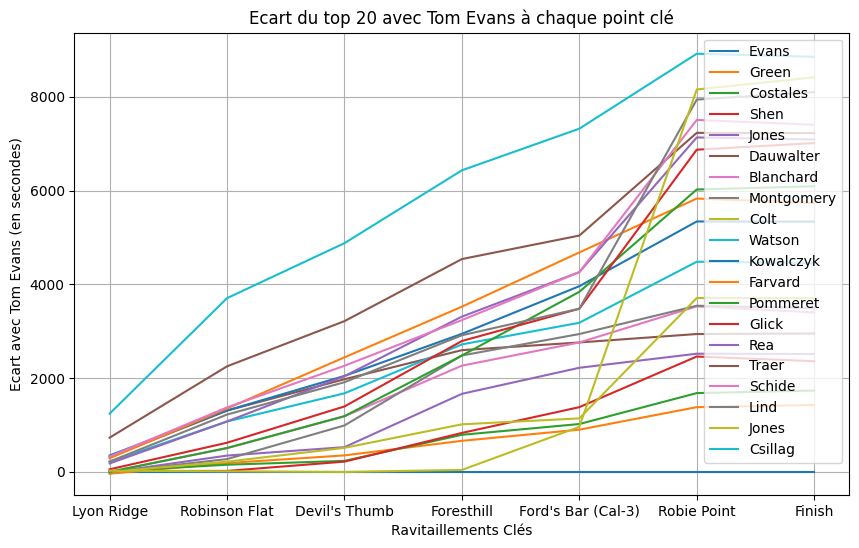

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for index, row in df_top20.iterrows():
    runner_name = row['Last Name']
    gap_values = [row[split + '_GAP'] for split in key_splits]
    plt.plot(key_splits, gap_values, label=runner_name)

plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Ravitaillements Clés')
plt.ylabel('Ecart avec Tom Evans (en secondes)')
plt.title('Ecart du top 20 avec Tom Evans à chaque point clé')


# EXPLANATIONS

# While plotting top20 evolution during the race, we can notice Jones runner was in front of the race 
# with Evans until Foresthill at least. Let plot him and Zhao to see evolutions.

In [84]:
jones_position_19 = df_2023_clean[df_2023_clean['Overall Place'] == 19]
print(jones_position_19[['Last Name', 'First Name']])

   Last Name First Name
18     Jones     Dakota


# It's one of the favorite : Dakota Jones who try to win and blew up on the second part of the race

In [85]:
#Let's plot the top10, Zaho and Dakota 
zhao_row = df_2023_clean[df_2023_clean['Last Name'] == 'Zhao']
df_top10 = df_2023_clean.head(10)

df_top10_zhao_jones = pd.concat([df_top10, zhao_row, jones_position_19], ignore_index=True)

Text(0.5, 1.0, 'Ecart du top 10 avec Tom Evans à chaque point clé avec Dakota et Zhao')

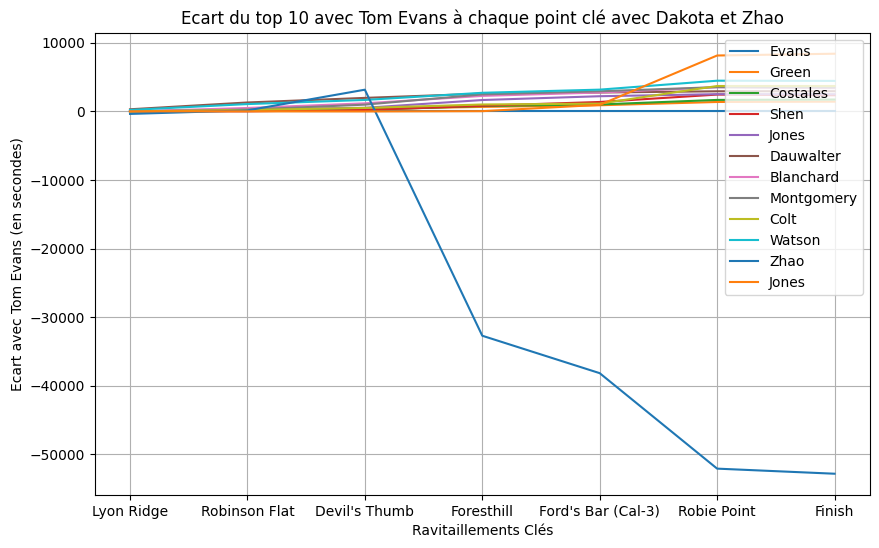

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for index, row in df_top10_zhao_jones.iterrows():
    runner_name = row['Last Name']
    gap_values = [row[split + '_GAP'] for split in key_splits]
    plt.plot(key_splits, gap_values, label=runner_name)

plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Ravitaillements Clés')
plt.ylabel('Ecart avec Tom Evans (en secondes)')
plt.title('Ecart du top 10 avec Tom Evans à chaque point clé avec Dakota et Zhao')

# EXPLANATIONS

Zaho was on the fastest trailers but he blew up after Robinson Flat.

Text(0.5, 1.0, 'Ecart du top 10 avec Tom Evans sur la première partie avec Dakota et Zhao')

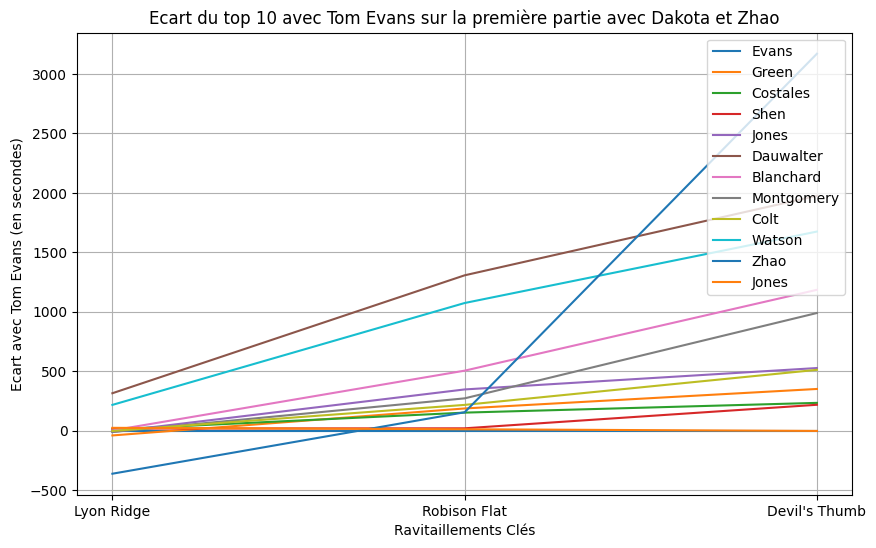

In [90]:
# Plot more precisely
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for index, row in df_top10_zhao_jones.iterrows():
    runner_name = row['Last Name']
    gap_values = [row["Lyon Ridge_GAP"], row["Robinson Flat_GAP"], row["Devil's Thumb_GAP"]]
    plt.plot(["Lyon Ridge", "Robison Flat", "Devil's Thumb"], gap_values, label=runner_name)

plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Ravitaillements Clés')
plt.ylabel('Ecart avec Tom Evans (en secondes)')
plt.title('Ecart du top 10 avec Tom Evans sur la première partie avec Dakota et Zhao')

Text(0.5, 1.0, 'Ecart du top 10+Dakota Jones avec Tom Evans sur la seconde partie')

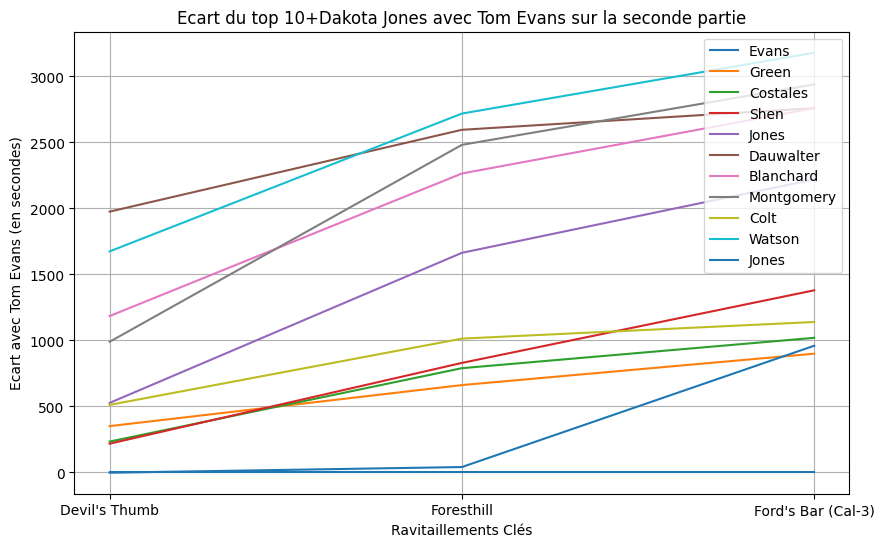

In [91]:
# Plot more precisely without Zhao for the second split
import matplotlib.pyplot as plt

df_top10_jones = pd.concat([df_top10, jones_position_19], ignore_index=True)
plt.figure(figsize=(10, 6))
for index, row in df_top10_jones.iterrows():
    runner_name = row['Last Name']
    gap_values = [row["Devil's Thumb_GAP"], row["Foresthill_GAP"], row["Ford's Bar (Cal-3)_GAP"], ]
    plt.plot(["Devil's Thumb", "Foresthill", "Ford's Bar (Cal-3)"], gap_values, label=runner_name)

plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Ravitaillements Clés')
plt.ylabel('Ecart avec Tom Evans (en secondes)')
plt.title('Ecart du top 10+Dakota Jones avec Tom Evans sur la seconde partie')

Text(0.5, 1.0, 'Ecart du top 10+Dakota Jones avec Tom Evans sur la dernière partie')

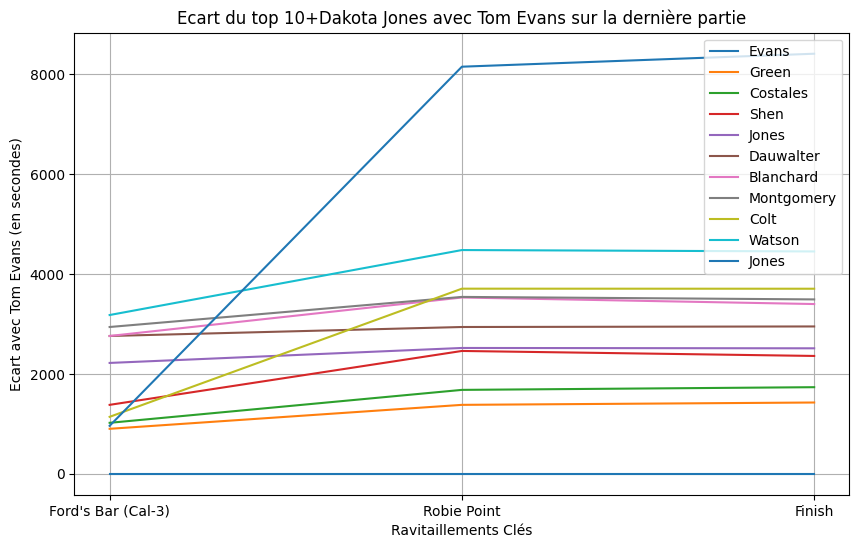

In [92]:
# Plot more precisely
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for index, row in df_top10_jones.iterrows():
    runner_name = row['Last Name']
    gap_values = [row["Ford's Bar (Cal-3)_GAP"], row["Robie Point_GAP"], row["Finish_GAP"], ]
    plt.plot(["Ford's Bar (Cal-3)", "Robie Point", "Finish"], gap_values, label=runner_name)

plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('Ravitaillements Clés')
plt.ylabel('Ecart avec Tom Evans (en secondes)')
plt.title('Ecart du top 10+Dakota Jones avec Tom Evans sur la dernière partie')

### TRY A MODEL IMPLEMENTATION

I compilated the top 100 all time best times at Western States and UTMB index equivalent and associate the marathon PB for as much as possible trailers (tough work because lot's of trailers don't like marathon), thanks to that I can try a model implementation to see any correlation. 

No data cleaning is necessary because it was my own excel file

In [28]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
# Import marathon data
file_path = 'RPMarathon.xlsx'  
df_marathon = pd.read_excel(file_path, engine='openpyxl')

In [30]:
# Drop empty values
df_marathon_filtered = df_marathon[df_marathon["Points IAAF Marathon"].notna()]

In [31]:
df_marathon_filtered

Classement all time           Colonne2  Colonne3 Colonne4  Colonne5  \
0                     1       Jim Walmsley        29       AZ      2019   
2                     3        Rod Farvard        28       CA      2024   
3                     4       Hayden Hawks        33       UT      2024   
6                     7       Daniel Jones        33      NZL      2024   
7                     8        Caleb Olson        28       UT      2024   
8                     9          Tom Evans        31      GBR      2023   
11                   12           Rob Krar        38       AZ      2015   
13                   14     Jonathan Albon        35  GBR/NOR      2024   
15                   16        Ryan Sandes        30      ZAF      2012   
19                   20   Anthony Costales        34       UT      2023   
20                   21     Jia-Sheng Shen        29      CHN      2024   
32                   33       Daniel Jones        32      NZL      2023   
41                   42    Ryan Montgomery        29       UT      2023   
59                   60        Cole Watson        31       CA      2023   
79                   80  Janosch Kowalczyk        32      DEU      2023   
89                   90   Ludovic Pommeret        46      FRA      2022   

    Colonne6  UTMB index RP Marathon   Points IAAF Marathon  \
0   14:09:28       966.0     02:15:05                1079.0   
2   14:24:15       922.0     02:40:30                 710.0   
3   14:24:31       922.0     02:23:01                 955.0   
6   14:32:29       913.0     02:21:56                 971.0   
7   14:40:12       905.0     02:43:31                 671.0   
8   14:40:22       921.0     02:26:07                 909.0   
11  14:48:59       930.0     02:38:03                 742.0   
13  14:57:01       888.0     02:30:32                 845.0   
15  15:03:56       914.0     02:50:08                 591.0   
19  15:09:16       891.0     02:13:13                1108.0   
20  15:09:49       876.0     02:20:47                 989.0   
32  15:22:15       879.0     02:21:56                 971.0   
41  15:38:35       864.0     02:27:45                 885.0   
59  15:54:36       849.0     02:27:42                 886.0   
79  16:09:19       836.0     02:32:27                 818.0   
89  16:20:02       855.0     02:31:51                 827.0   

                                                 Wiki Unnamed: 10  
0                                                 NaN         NaN  
2                                     world athletics         NaN  
3                                                 NaN         NaN  
6   https://www.strava.com/activities/2292237024/b...         NaN  
7                                                wiki         NaN  
8                                                 NaN         NaN  
11                                                NaN         NaN  
13                                                NaN         NaN  
15                                            No data         NaN  
19                                    world athletics         NaN  
20                                                NaN         NaN  
32                                                NaN         NaN  
41                                                NaN         NaN  
59                                                NaN         NaN  
79                                                NaN         NaN  
89                                                NaN         NaN

In [32]:
# Extract interesting values
X = df_marathon_filtered['UTMB index'].values.reshape(-1, 1)  
y = df_marathon_filtered['Points IAAF Marathon'].values 

In [33]:
# Test a Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = model.score(X, y)

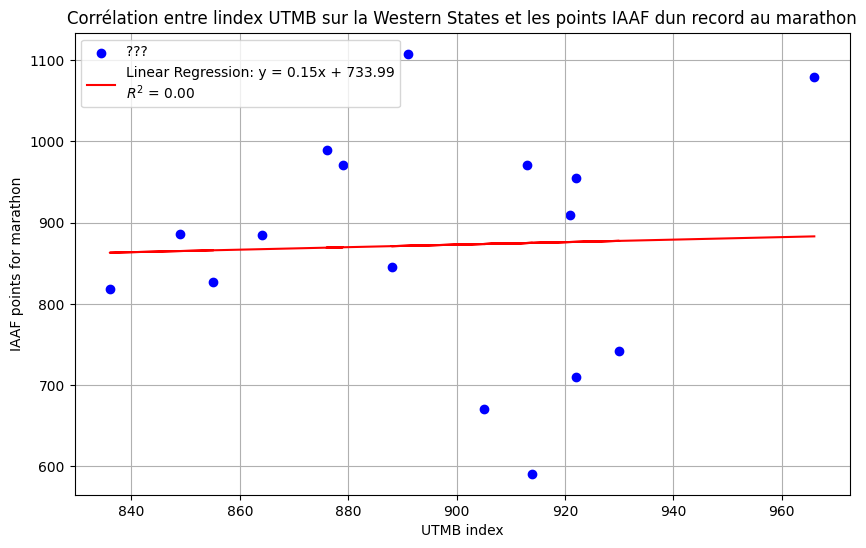

In [93]:
# Display
intercept = model.intercept_
slope = model.coef_[0]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Point par Athlète', color='black')  # TODO
plt.plot(X, y_pred, label=f'Régression linéaire : y = {slope:.2f}x + {intercept:.2f}\nCoefficient de Détermination = {r_squared:.2f}', color='red')

plt.xlabel('UTMB index')  # TODO
plt.ylabel('IAAF points for marathon')  # TODO
plt.title("Corrélation entre l'index UTMB sur la Western States et les points IAAF d'un record au marathon")  # TODO
plt.legend()

plt.grid(True)
plt.show()

In [35]:
correlation_pearson = df_marathon_filtered['Points IAAF Marathon'].corr(df_marathon_filtered['UTMB index'], 'pearson')
print(f"Pearson : {correlation_pearson}")

Pearson : 0.037314439962062566


### ROUTE ANALYSIS

In [36]:
# Import dependencies
import xml.etree.ElementTree as ET
from geopy.distance import geodesic

In [43]:
# Get the gpx and extract data

gpx_wser = 'Western_States_100.gpx'
tree = ET.parse(gpx_wser)
root = tree.getroot()
namespaces = {'': 'http://www.topografix.com/GPX/1/1'}
gpx_data = []
for trkpt in root.findall('.//trkpt', namespaces):
    lat = float(trkpt.attrib['lat'])
    lon = float(trkpt.attrib['lon'])
    ele = float(trkpt.find('ele', namespaces).text)
    gpx_data.append((lat, lon, ele))

In [44]:
# Compute total distance
distances_miles = [0] 
for i in range(1, len(gpx_data)):
    dist = geodesic((gpx_data[i - 1][0], gpx_data[i - 1][1]), (gpx_data[i][0], gpx_data[i][1])).km * 0.621371
    distances_miles.append(distances_miles[-1] + dist)

# Get all elevation points on the route 
altitudes = [ele for _, _, ele in gpx_data]

# Filter all points above 2000 and agregate the distance above this elevation
distance_above_2000m_km = 0
for i in range(1, len(gpx_data)):
    if altitudes[i] > 2000:
        dist_km = geodesic((gpx_data[i - 1][0], gpx_data[i - 1][1]), (gpx_data[i][0], gpx_data[i][1])).km
        distance_above_2000m_km += dist_km

print(f"Nombre de kilomètres avec une altitude > 2000m pour la Western States: {distance_above_2000m_km:.2f} km")

Nombre de kilomètres avec une altitude > 2000m pour la Western States: 38.73 km


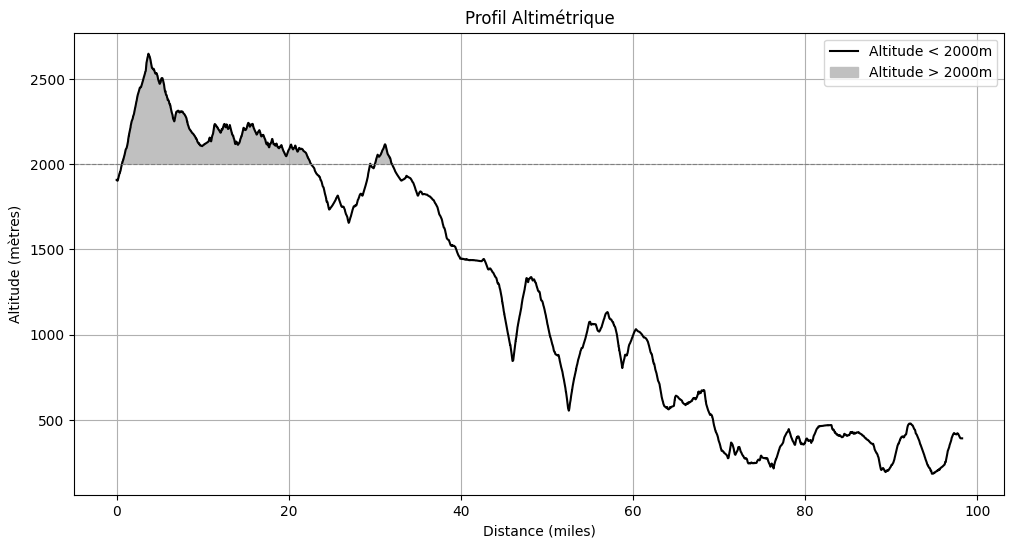

In [46]:
# Display race profile

plt.figure(figsize=(12, 6))
plt.plot(distances_miles, altitudes, color='black', label='Altitude < 2000m')
plt.fill_between(distances_miles, 2000, altitudes, where=[ele > 2000 for ele in altitudes], color='silver', label='Altitude > 2000m')
plt.axhline(y=2000, color='gray', linestyle='--', lw=0.8)

plt.title('Profil Altimétrique')
plt.xlabel('Distance (miles)')
plt.ylabel('Altitude (mètres)')
plt.legend()

plt.grid(True)
plt.show()

In [40]:
# Same pipeline for the UTMB, to make comparison
gpx_utmb = 'utmb-2024.gpx'

tree = ET.parse(gpx_utmb)
root = tree.getroot()
namespaces = {'': 'http://www.topografix.com/GPX/1/1'}

gpx_data = []
for trkpt in root.findall('.//trkpt', namespaces):
    lat = float(trkpt.attrib['lat'])
    lon = float(trkpt.attrib['lon'])
    ele = float(trkpt.find('ele', namespaces).text)
    gpx_data.append((lat, lon, ele))

distances_miles = [0] 
for i in range(1, len(gpx_data)):
    dist = geodesic((gpx_data[i - 1][0], gpx_data[i - 1][1]), (gpx_data[i][0], gpx_data[i][1])).km * 0.621371
    distances_miles.append(distances_miles[-1] + dist)

altitudes = [ele for _, _, ele in gpx_data]

distance_above_2000m_km = 0
for i in range(1, len(gpx_data)):
    if altitudes[i] > 2000:
        dist_km = geodesic((gpx_data[i - 1][0], gpx_data[i - 1][1]), (gpx_data[i][0], gpx_data[i][1])).km
        distance_above_2000m_km += dist_km

print(f"Nombre de kilomètres avec une altitude > 2000m pour l'UTMB : {distance_above_2000m_km:.2f} km")

Nombre de kilomètres avec une altitude > 2000m pour l'UTMB : 35.74 km


### Others analysis 

C:\Users\Mathieu GALLAND\AppData\Local\Temp\ipykernel_7568\1239302434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['finish_seconds'] = pd.to_timedelta(df_filtered['Finish_time']).dt.total_seconds()


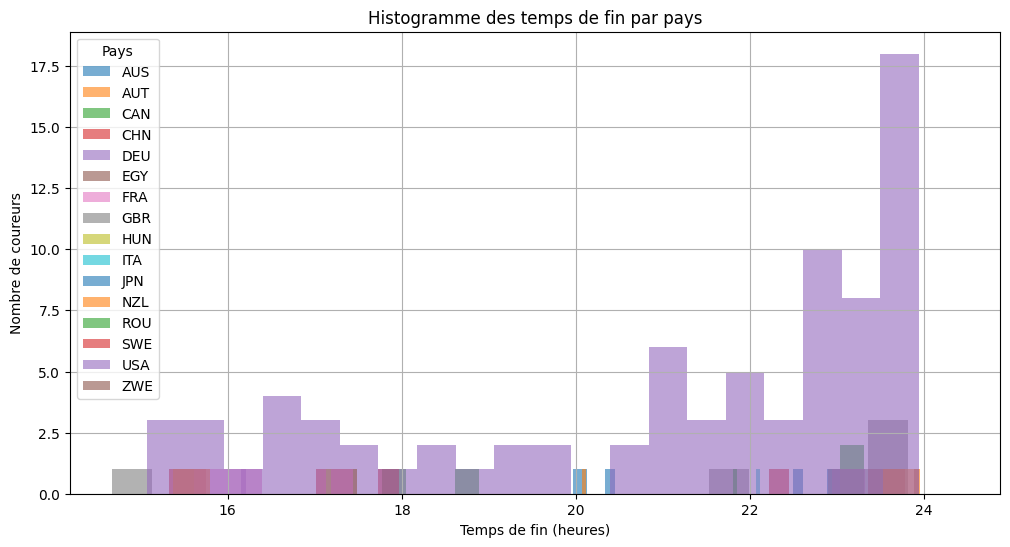

In [41]:
# Histogramm : finish time against countries
# TODO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_filtered['finish_seconds'] = pd.to_timedelta(df_filtered['Finish_time']).dt.total_seconds()
plt.figure(figsize=(12, 6))
for country, group in df_filtered.groupby('Country'):
    plt.hist(
        group['finish_seconds'] / 3600,
        bins=20,
        alpha=0.6,
        label=country
    )

plt.xlabel('Temps de fin (heures)')
plt.ylabel('Nombre de coureurs')
plt.title('Histogramme des temps de fin par pays')
plt.legend(title='Pays')
plt.grid(True)
plt.show()